Generate a set of randoms and load the in a pandas data frame

In [9]:
from RandomsGen_1 import generate_data_set, save_data_set

raw_data = generate_data_set(200, 1, 300)
save_data_set(raw_data, "dataset3.txt")

Use matplotlib to generate a chart with the x axes showing the iteration of the generator and on the y axes the value that was generated at that iteration.

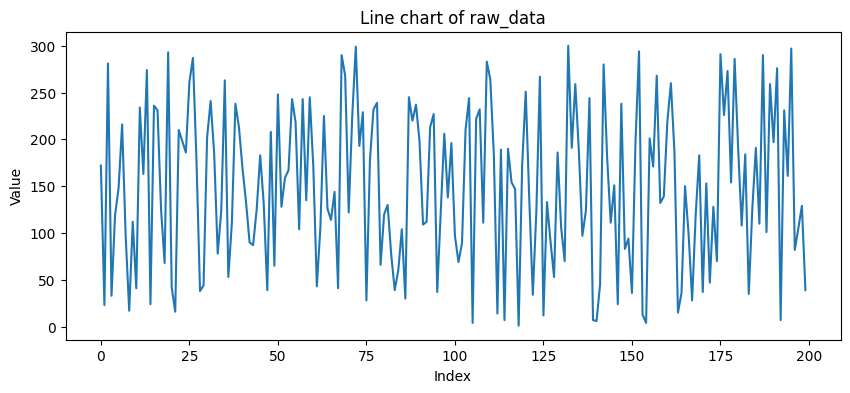

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4))
plt.plot(range(len(raw_data)), raw_data)
plt.xlabel("Index")
plt.ylabel("Value")
plt.title("Line chart of raw_data")
plt.show()


Load the raw data in a data frame

In [11]:
import pandas
from RandomsDataSet_0 import load_data_set

data_set = list(load_data_set("dataset3.txt").values())
df = pandas.DataFrame({
    "value": [obj.get_value() for obj in data_set],
    "count": [obj.get_count() for obj in data_set],
    "instance" : data_set
})

Create a bar chart with each value on the x axis and a bar extending on the y axis for each balue, showing the number of occurrences of that value in the generated set.

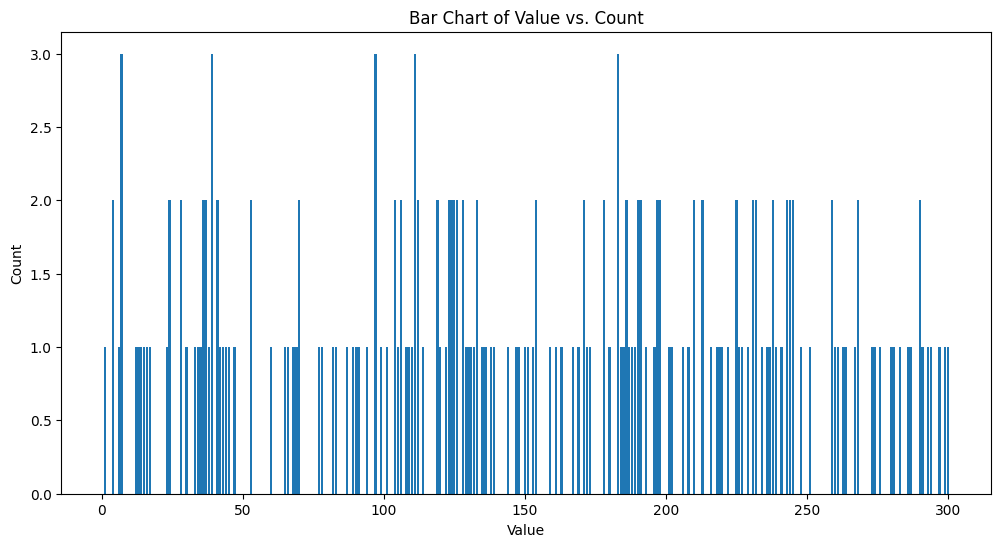

In [12]:
plt.figure(figsize=(12, 6))
plt.bar(df["value"], df["count"])
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Bar Chart of Value vs. Count")
plt.show()

Generate a box plot (or whisker plot) for all values in the data frame

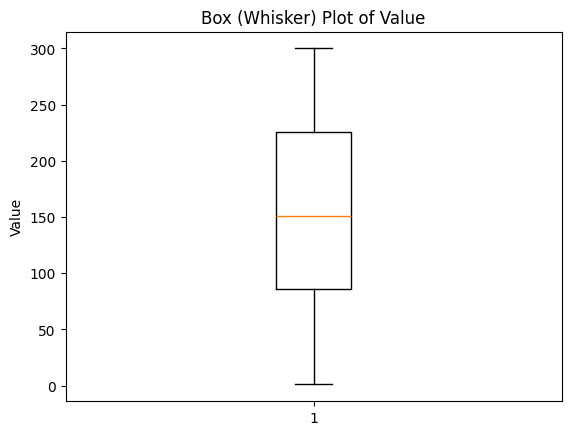

In [13]:
plt.boxplot(df["value"])
plt.ylabel("Value")
plt.title("Box (Whisker) Plot of Value")
plt.show()

Print the four values depicted in this box plot: The minimum (quantile(0)), the first quantile (the largest value of the smallest 25% of all values), the median (average), the third quantile (the largest value of the smallest 75% of all values) and the maximum (quantile(1)) value.

In [14]:
print(f'min = {df["value"].quantile(0)}')
print(f'Q1 = {df["value"].quantile(.25)}')
print(f'median = {df["value"].quantile(.5)}')
print(f'Q3 = {df["value"].quantile(.75)}')
print(f'max = {df["value"].quantile(1)}')


min = 1.0
Q1 = 86.0
median = 150.5
Q3 = 225.25
max = 300.0


plotting a custom whisker plot for the 10 and 90 percentiles rather than 25 and 75.

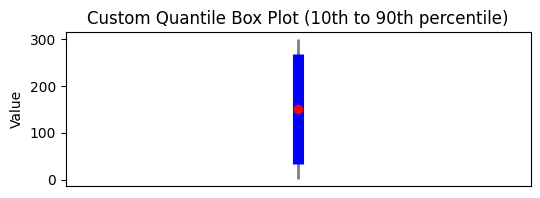

In [15]:
q0 = df["value"].quantile(0)        # min
q10 = df["value"].quantile(0.1)     # 10%
q50 = df["value"].quantile(0.5)     # 50%
q90 = df["value"].quantile(0.9)     # 90%
q1 = df["value"].quantile(1)        # max

plt.figure(figsize=(6, 2))
plt.vlines(1, q0, q1, color='gray', linewidth=2)  # whiskers
plt.vlines(1, q10, q90, color='blue', linewidth=8)          # custom "box"
plt.plot(1, q50, 'ro')                                   # median as a red dot

plt.xticks([])
plt.ylabel("Value")
plt.title("Custom Quantile Box Plot (10th to 90th percentile)")
plt.show()
